In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import ast
import glob

Roughly ~50 million doodles

340 classes

Reasonable distribution of samples across classes (maybe max factor of 2 difference) - 100,000-300,000 images per class

In [35]:
IMAGE_LOC = '/nvme/DoodleData/'

In [45]:
label_list = glob.glob(f'{IMAGE_LOC}/*.csv')

In [47]:
chosen_labels = label_list[0:3]

In [54]:
N_IMAGES_TO_READ = 1000 #per class

In [63]:
def generate_csv(chosen_labels):
    df_list = []
    
    for file in chosen_labels:
        df = pd.read_csv(file).sample(N_IMAGES_TO_READ)
        
        df_list.append(df)
    
    df = pd.concat(df_list, axis=0).reset_index()
    
    return df

def draw_image(draw_string):
    mat = np.array(ast.literal_eval(draw_string))
    for entry in mat:
        plt.plot(entry[0], entry[1])

In [60]:
df = generate_csv(chosen_labels)

In [62]:
df.head()

,index,countrycode,drawing,key_id,recognized,timestamp,word
0,27936,US,"[[[0, 7, 5, 9, 11, 41, 49, 74, 120, 119, 110, ...",6324268147146752,True,2017-03-02 14:37:12.150620,power outlet
1,138141,US,"[[[40, 96, 199, 216, 227, 203, 172, 168, 94, 2...",5075671392976896,True,2017-03-11 20:44:51.839820,power outlet
2,155911,UA,"[[[79, 70, 58, 50, 49, 58, 89, 112, 144, 154, ...",5066348629590016,True,2017-03-10 15:53:18.339640,power outlet
3,100182,US,"[[[144, 80, 44, 38, 0, 49, 139, 163, 166, 164,...",5709530153353216,True,2017-01-23 02:11:13.741200,power outlet
4,65142,CA,"[[[8, 10, 5, 4, 7, 12, 46, 126, 214, 219, 222,...",5665050628980736,True,2017-03-03 17:24:03.745580,power outlet


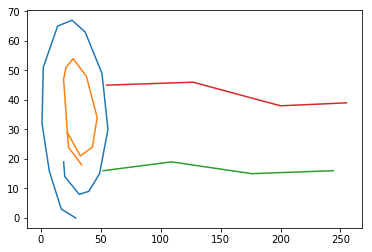

In [68]:
draw_image(df['drawing'][2200])

In [70]:
df['word'][2200]

'key'

# Model for multi-class classification